# Introduction

This dataset includes relations between students performance in three specific subjects in the exame based of five different factors or features.

### Columns in the dataset
<font color="blue">

- Gender
    
- race/ethnicity

- parental level of education

- lunch

- test preperation course

- math score

- reading score

- writing score

## List of Plots
1. [Bar Plot](#1)
2. [Heatmap](#2)
3. [Count Plot](#3)
4. [Box Plot](#4)
5. [Histogram](#5)
6. [Scatter Plot](#6)
7. [Pie Chart](#7)


In [93]:
# Importing Necessary Libraries
import pandas as pd               # Required for Linear Algebra Operations
import numpy as np               # Required for basic and advanced array operations 
import matplotlib.pyplot as plt  # Required for working with figures
import seaborn as sns            # Required for statistical operations
%matplotlib inline
# Backend code to show figures inline in the frontend

In [94]:
df = pd.read_csv('StudentsPerformance.csv') # creating a DataFrame

In [95]:
df.info() #Information of created DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [96]:
df.head()           # To see the first five rows of DataFrame

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [97]:
# Checking for any null value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [98]:
# Finding some valuable info like mean, minimum, standard deviaion, percentiles, and maximum of scores
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Correlation Insight

In [99]:
# finding the correlation among scores
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<a id=1></a>
## Bar Plots

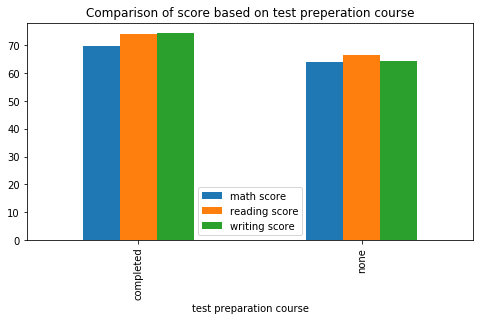

In [100]:
# Comparison of students' score based on test preperation course
plt.rcParams['figure.figsize'] = (8,4)  #Increasing the figure size
df.groupby(['test preparation course']).mean().plot.bar()
plt.title('Comparison of score based on test preperation course')
plt.show()

**Insight:** There is a positive correlation between test preperation course and test scores.

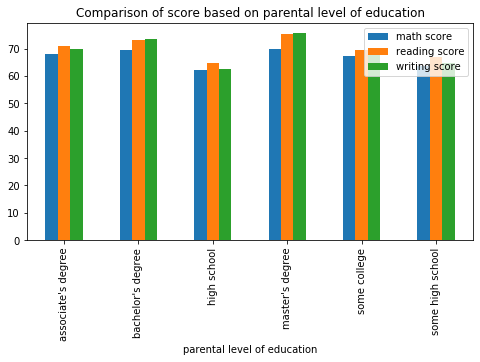

In [101]:
# Comparison of students' score based on parental level of education
plt.rcParams['figure.figsize'] = (8,4)
df.groupby(['parental level of education']).mean().plot.bar()
plt.title('Comparison of score based on parental level of education')
plt.show()

**Insight:** Student whose parents completed only hight school, had lower score in test.

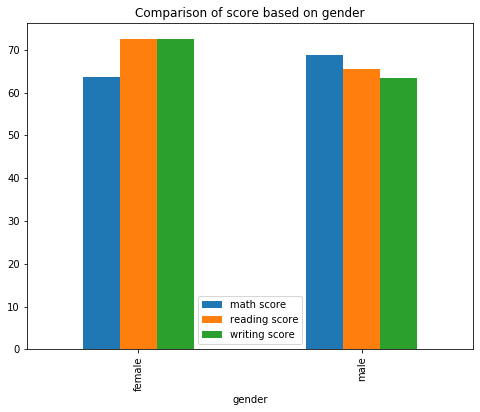

In [102]:
# Comparison of students' score based on gender
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['gender']).mean().plot.bar()
plt.title('Comparison of score based on gender')
plt.show()

**Insight:** 
    
- Female have lower score in mathematics while male has higher.

- Handwriting of male is poor than their femare peers

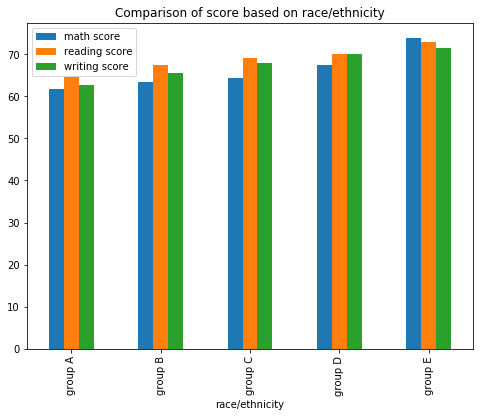

In [103]:
# Comparison of students' score based on race/ethnicity
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['race/ethnicity']).mean().plot.bar()
plt.title('Comparison of score based on race/ethnicity')
plt.show()

**Insight:** Ethnicity group A has lower grade while group E has the highest score.

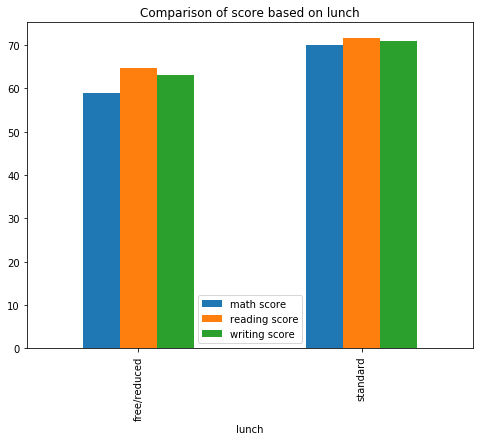

In [104]:
# Comparison of students' score based on lunch
plt.rcParams['figure.figsize'] = (8,6)
df.groupby(['lunch']).mean().plot.bar()
plt.title('Comparison of score based on lunch')
plt.show()

**Insight:** Student with standard lunch performed better in the exam.

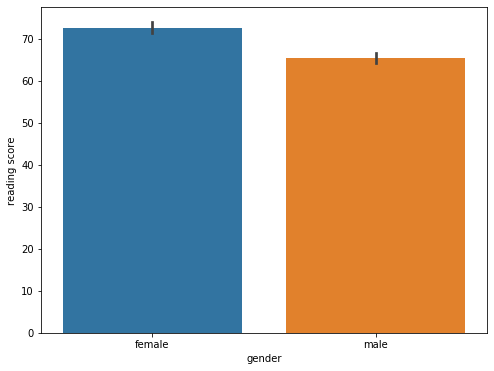

In [105]:
dp = sns.barplot(x='gender', y='reading score', data = df)

**Insight:** Female had the betteer score with higher mean in reading than male

## Correlation using Heatmap

<a id=2></a>
## Heatmap

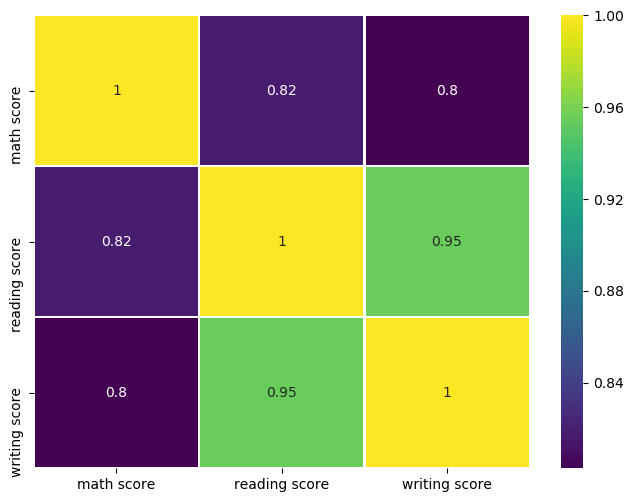

In [106]:
plt.figure(dpi=100)
hm = sns.heatmap(df.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

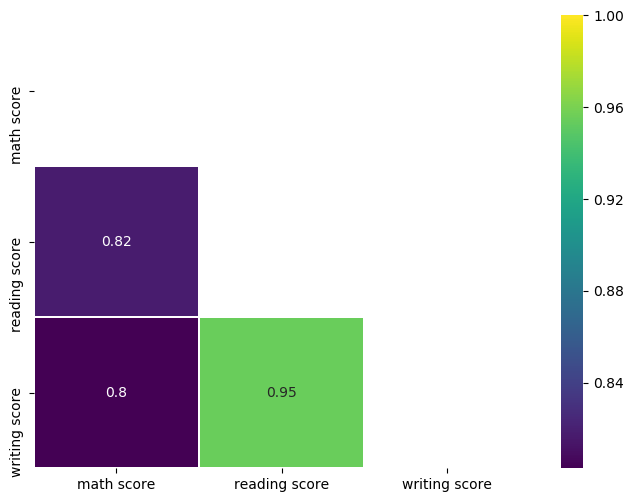

In [107]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
hm = sns.heatmap(df.corr(), mask=mask, annot=True,lw=1,linecolor='white',cmap='viridis')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

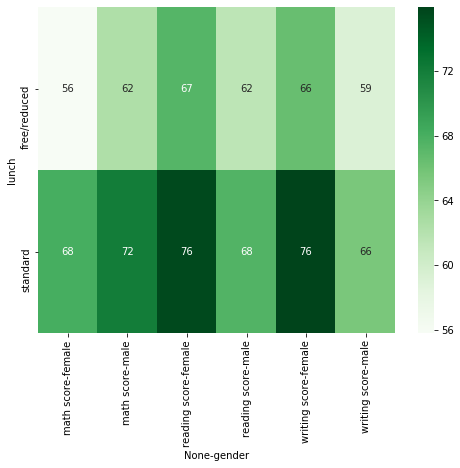

In [108]:
pivot = pd.pivot_table(data = df, index = ["lunch"], columns = ["gender"], aggfunc = {'math score' : np.mean,
                                                                                                                              'reading score' : np.mean,
                                                                                                                              'writing score' : np.mean})
hm = sns.heatmap(data = pivot, annot = True, cmap = "Greens")
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [109]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<a id=3></a>
## Count Plot

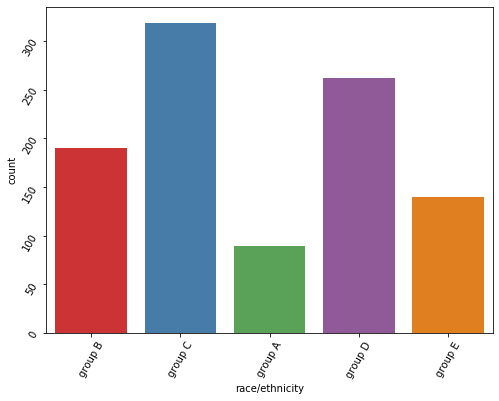

In [110]:
cp = sns.countplot(x="race/ethnicity", data=df, palette="Set1") #Count the number of students in each race/ethnicity
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
cp

**Insight:** Ethnicity group C is the highest in number whereas group A is the lowest.

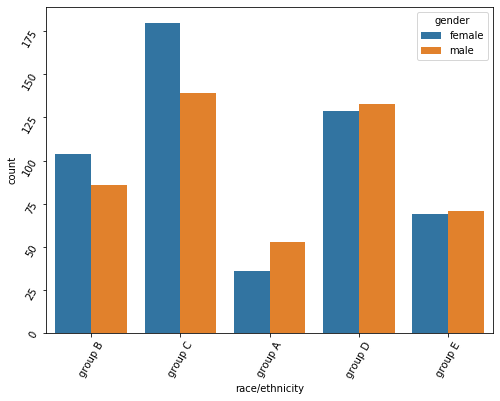

In [111]:
cp = sns.countplot(x="race/ethnicity", hue='gender', data=df) #Count the number of students' gender in each race/ethnicity
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
cp

**Insight:** Ethnicity group E has almost equal number of male and female students

<a id=4></a>
## Box Plot

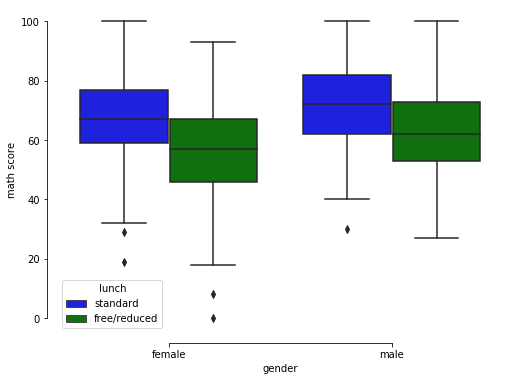

In [112]:
sns.boxplot(x="gender", y="math score",
            hue='lunch', palette=["b", "g"],
            data=df)
sns.despine(offset=10, trim=True)

**Insight:** 

    - Male had betteer score than female
    
    - Male with standard lunch had better score in math

<a id=5></a>
## Histogram

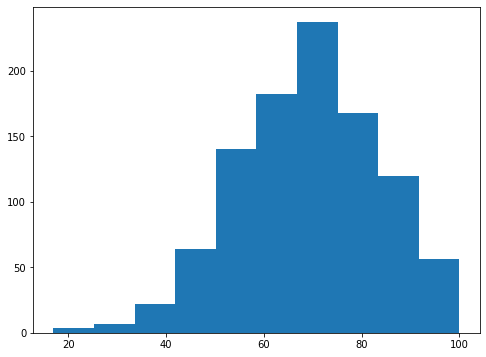

In [113]:
plt.hist(df['reading score'], bins=10)
plt.show()

**Insight:**  The highest reading score was between 60 and 80

<a id=6></a>
## Scatter plot

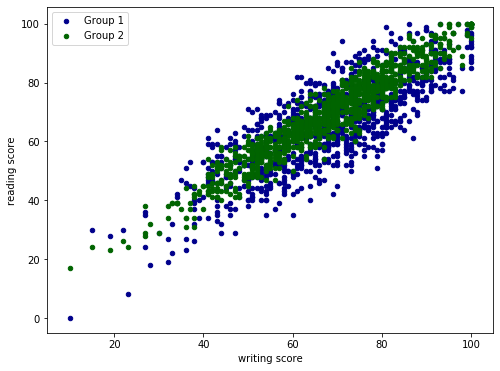

In [114]:
wm = df.plot.scatter(x='writing score', y='math score', color='DarkBlue', label='Group 1')
wr = df.plot.scatter(x='writing score', y='reading score', color='DarkGreen', label='Group 2', ax=wm)

**Insight:**  The comparison of writing and math score was more scattered than of writing and reading score

<a id=7></a>
## Pie Chart

### I considered score greater than 40 as Pass and less than 40 as Fail.

In [115]:
# Calculating Pass/Fail
def result(MS,WS,RS ):
    if(MS>40 and WS>40 and RS>40):
        return 'P'
    else:
        return 'F'

In [116]:
# Adding a new column named Pass/Fail
df['Pass/Fail']=df.apply(lambda x: result(x['math score'],x['writing score'],x['reading score']),axis = 1 )

In [117]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P
4,male,group C,some college,standard,none,76,78,75,P


In [118]:
# Counting the number of pass and fail student
df['Pass/Fail'].value_counts()

P    939
F     61
Name: Pass/Fail, dtype: int64

Text(0.5, 1.0, 'Percentage of students Passed/Failed')

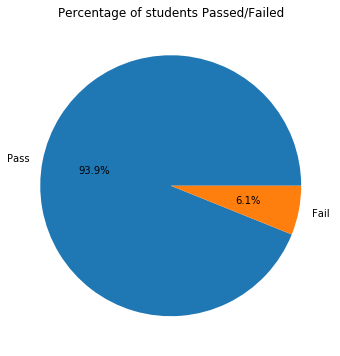

In [119]:
plt.pie(df['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed')

**Insight** 93.9% sutdent pass in all subjects